# Preparação do ambiente

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import unidecode

from os import path as osp

# from collections import defaultdict
from itertools import pairwise
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from tqdm.auto import tqdm

In [2]:
pd.options.mode.copy_on_write = True

## Constantes e funções auxiliares

In [3]:
NULL_STRING = '#NULO#'
MAX_CAT_COUNT = 4

In [4]:
def get_clean_docs(docs):
   
    # limpeza inicial dos documentos
    # lowercase e remoção de acentos
    # extração e contatgem dos tokens
    clean_tokens = []
    tokens_freq = FreqDist()

    stop_words = stopwords.words('portuguese')
    # alguns anúncios possuem texto relacionado em inglês
    stop_words.extend(stopwords.words('english'))
    stop_words.extend(set(word_tokenize(NULL_STRING.lower())))
    
    for doc in tqdm(docs):
        doc = unidecode.unidecode(doc.lower())
        tokens = [token for token in word_tokenize(doc) if token not in stop_words and token not in punctuation]
        clean_tokens.append(tokens)
        tokens_freq.update(tokens)
    
    clean_docs = [' '.join(tokens) for tokens in clean_tokens]

    return clean_docs, clean_tokens, tokens_freq

In [5]:
def plot_doc_vectors(docs, targets, top_cats=False, s=5, ngram_range=(1,1)):
    
    count_vectorizer = CountVectorizer(ngram_range=ngram_range)
    docs_count_matrix = count_vectorizer.fit_transform(docs)
    
    count_vectorizer_2 = CountVectorizer(min_df=2,ngram_range=ngram_range)
    docs_count_matrix_2 = count_vectorizer_2.fit_transform(docs)
    
    count_vectorizer_5 = CountVectorizer(min_df=5,ngram_range=ngram_range)
    docs_count_matrix_5 = count_vectorizer_5.fit_transform(docs)

    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    docs_tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
    
    tfidf_vectorizer_2 = TfidfVectorizer(min_df=2,ngram_range=ngram_range)
    docs_tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(docs)
    
    tfidf_vectorizer_5 = TfidfVectorizer(min_df=5,ngram_range=ngram_range)
    docs_tfidf_matrix_5 = tfidf_vectorizer_5.fit_transform(docs)
    
    pca = TruncatedSVD(n_components=2)
    
    pca_count_docs = pca.fit_transform(docs_count_matrix)
    pca_count_docs_2 = pca.fit_transform(docs_count_matrix_2)
    pca_count_docs_5 = pca.fit_transform(docs_count_matrix_5)
    
    pca_tfidf_docs = pca.fit_transform(docs_tfidf_matrix)
    pca_tfidf_docs_2 = pca.fit_transform(docs_tfidf_matrix_2)
    pca_tfidf_docs_5 = pca.fit_transform(docs_tfidf_matrix_5)
    
    count_scatter_x = pca_count_docs[:, 0] # first principle component
    count_scatter_y = pca_count_docs[:, 1] # second principle component
    
    count_scatter_x_2 = pca_count_docs_2[:, 0] # first principle component
    count_scatter_y_2 = pca_count_docs_2[:, 1] # second principle component
    
    count_scatter_x_5 = pca_count_docs_5[:, 0] # first principle component
    count_scatter_y_5 = pca_count_docs_5[:, 1] # second principle component

    tfidf_scatter_x = pca_tfidf_docs[:, 0] # first principle component
    tfidf_scatter_y = pca_tfidf_docs[:, 1] # second principle component
    
    tfidf_scatter_x_2 = pca_tfidf_docs_2[:, 0] # first principle component
    tfidf_scatter_y_2 = pca_tfidf_docs_2[:, 1] # second principle component
    
    tfidf_scatter_x_5 = pca_tfidf_docs_5[:, 0] # first principle component
    tfidf_scatter_y_5 = pca_tfidf_docs_5[:, 1] # second principle component
    
    fig, axs = plt.subplots(2,3,figsize=(15,10))
    
    # group by clusters and scatter plot every cluster
    # with a colour and a label
    if not top_cats:
        for group in np.unique(targets):
            ix = np.where(targets == group)
            
            axs[0][0].scatter(count_scatter_x[ix], count_scatter_y[ix], label=group, s=s)
            axs[0][1].scatter(count_scatter_x_2[ix], count_scatter_y_2[ix], label=group, s=s)
            axs[0][2].scatter(count_scatter_x_5[ix], count_scatter_y_5[ix], label=group, s=s)
            
            axs[1][0].scatter(tfidf_scatter_x[ix], tfidf_scatter_y[ix], label=group, s=s)
            axs[1][1].scatter(tfidf_scatter_x_2[ix], tfidf_scatter_y_2[ix], label=group, s=s)
            axs[1][2].scatter(tfidf_scatter_x_5[ix], tfidf_scatter_y_5[ix], label=group, s=s)
    else:
        ix_top = np.where(targets == 1)
        ix_other = np.where(targets > 1)
        for ix,group in zip([ix_top, ix_other],['top','other']):
            
            axs[0][0].scatter(count_scatter_x[ix], count_scatter_y[ix], label=group, s=s)
            axs[0][1].scatter(count_scatter_x_2[ix], count_scatter_y_2[ix], label=group, s=s)
            axs[0][2].scatter(count_scatter_x_5[ix], count_scatter_y_5[ix], label=group, s=s)
            
            axs[1][0].scatter(tfidf_scatter_x[ix], tfidf_scatter_y[ix], label=group, s=s)
            axs[1][1].scatter(tfidf_scatter_x_2[ix], tfidf_scatter_y_2[ix], label=group, s=s)
            axs[1][2].scatter(tfidf_scatter_x_5[ix], tfidf_scatter_y_5[ix], label=group, s=s)
    
    axs[0][0].set_title('CountVectorizer')
    axs[0][1].set_title('CountVectorizer (min_df=2)')
    axs[0][2].set_title('CountVectorizer (min_df=5)')
    
    axs[1][0].set_title('TfidfVectorizer')
    axs[1][1].set_title('TfidfVectorizer (min_df=2)')
    axs[1][2].set_title('TfidfVectorizer (min_df=5)')
    
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # plt.xlabel("PCA 0")
    # plt.ylabel("PCA 1")
    plt.show()

# Carga e prepação dos dados

## Carga dos arquivos, limpeza e separação dos dataframes

Anúncios brutos, coletados pelo Regulatron.

In [6]:
file_amazon_raw = '../datasets/regulatron_legacy/raw/amazon.parquet.gzip'
file_amazon_clean = '../datasets/regulatron_legacy/clean/amazon_clean.parquet'

if osp.exists(file_amazon_clean):
    df_amazon_clean = pd.read_parquet(file_amazon_clean)
    tokens_nome = [nome.split() for nome in df_amazon_clean.nome]
    tokens_descricao = [descricao.split() for descricao in df_amazon_clean.descricao]
    nome = df_amazon_clean.nome.to_numpy()
    descricao = df_amazon_clean.descricao.to_numpy()
    target = df_amazon_clean.target.to_numpy()
else:
    df_amazon = pd.read_parquet(file_amazon).reset_index(drop=True)
    
    columns_to_keep = ['Nome', 'Marca', 'Modelo', 'Descrição', 'Descrição_Principal', 'cat_0']
    df_amazon = df_amazon[columns_to_keep].fillna(NULL_STRING)
    
    columns_to_join = ['Nome', 'Marca', 'Modelo', 'Descrição', 'Descrição_Principal']
    df_amazon['descricao'] = df_amazon[columns_to_join].apply(lambda row: ' '.join(row),axis=1)
    
    columns_to_keep = ['Nome', 'descricao', 'cat_0']
    df_amazon = df_amazon[columns_to_keep]
    df_amazon.columns = ['nome', 'descricao', 'target']

    nome, tokens_nome, tf_nome = get_clean_docs(df_amazon.nome)
    descricao, tokens_descricao, tf_descicao = get_clean_docs(df_amazon.descricao)
    target = df_amazon.target.to_numpy()

    df_amazon_clean = pd.DataFrame({'nome': nome, 'descricao': descricao, 'target': target})
    df_amazon_clean.to_parquet(file_amazon_clean,compression='gzip')
    
df_amazon_clean

,nome,descricao,target
0,filtro lente efeitos especiais blue streak cam...,filtro lente efeitos especiais blue streak cam...,Eletrônicos e Tecnologia
1,motores escova 4 conjuntos motores escova dron...,motores escova 4 conjuntos motores escova dron...,Eletrônicos e Tecnologia
2,bolsa armazenamento protetora drone capa rigid...,bolsa armazenamento protetora drone capa rigid...,Brinquedos e Jogos
3,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,Eletrônicos e Tecnologia
4,remote control car brushless motor servo kit r...,remote control car brushless motor servo kit r...,Eletrônicos e Tecnologia
...,...,...,...
151777,mini drone bolso hd folding fotografia aerea q...,mini drone bolso hd folding fotografia aerea q...,Eletrônicos e Tecnologia
151778,yitre mini carregador portatil 2 1 carregador ...,yitre mini carregador portatil 2 1 carregador ...,Eletrônicos e Tecnologia
151779,kit reforco sinal kit reforco sinal amplificad...,kit reforco sinal kit reforco sinal amplificad...,Computadores e Informática
151780,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,Eletrônicos e Tecnologia


# Visualização dos dados

## Tokens

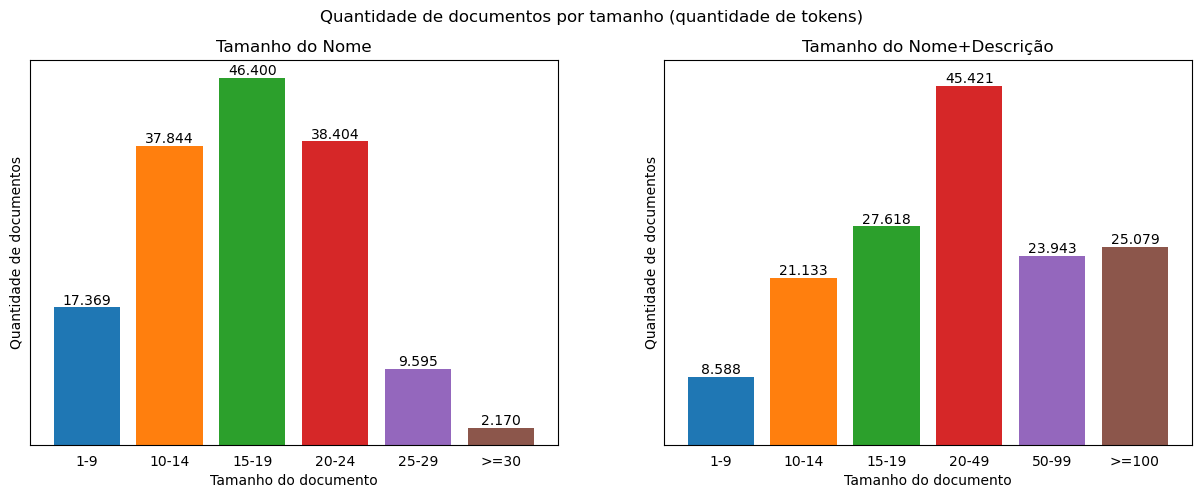

In [7]:
len_nome = [len(doc) for doc in tokens_nome]
len_desc = [len(doc) for doc in tokens_descricao]

bins_nome = [1,10,15,20,25,30,100]
bins_desc = [1,10,15,20,50,100,1200]
heights_nome,_ = np.histogram(len_nome,bins=bins_nome)
heights_desc,_ = np.histogram(len_desc,bins=bins_desc)

x_nome = []
for start,stop in pairwise(bins_nome):
    if stop==bins_nome[-1]:
        x_nome.append(f'>={start}')
    elif stop==start+1:
        x_nome.append(f'{start}')
    else:
        x_nome.append(f'{start}-{stop-1}')

x_desc = []
for start,stop in pairwise(bins_desc):
    if stop==bins_desc[-1]:
        x_desc.append(f'>={start}')
    elif stop==start+1:
        x_desc.append(f'{start}')
    else:
        x_desc.append(f'{start}-{stop-1}')
        
fig, axs = plt.subplots(1,2,figsize=(15,5),sharey=True)
    
for i in range(len(heights_nome)):
    p_nome = axs[0].bar(x_nome[i],heights_nome[i])
    labels = ['{:,d}'.format(heights_nome[i]).replace(',','.')]
    axs[0].bar_label(p_nome, label_type='edge', labels=labels)
    
for i in range(len(heights_desc)):
    p_desc = axs[1].bar(x_desc[i],heights_desc[i])
    labels = ['{:,d}'.format(heights_desc[i]).replace(',','.')]
    axs[1].bar_label(p_desc, label_type='edge',labels=labels)
    

# # remove the frame of the chart
for ax in axs:
    
    ax.tick_params(bottom=False, left=False,
               labelbottom=True, labelleft=False)
    # ax.spines['left'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    
    ax.set_xlabel('Tamanho do documento')
    ax.set_ylabel('Quantidade de documentos')

fig.suptitle('Quantidade de documentos por tamanho (quantidade de tokens)')
axs[0].set_title('Tamanho do Nome')
axs[1].set_title('Tamanho do Nome+Descrição')


plt.show()

## Documentos no espaço vetorial

### Nome 1-gram

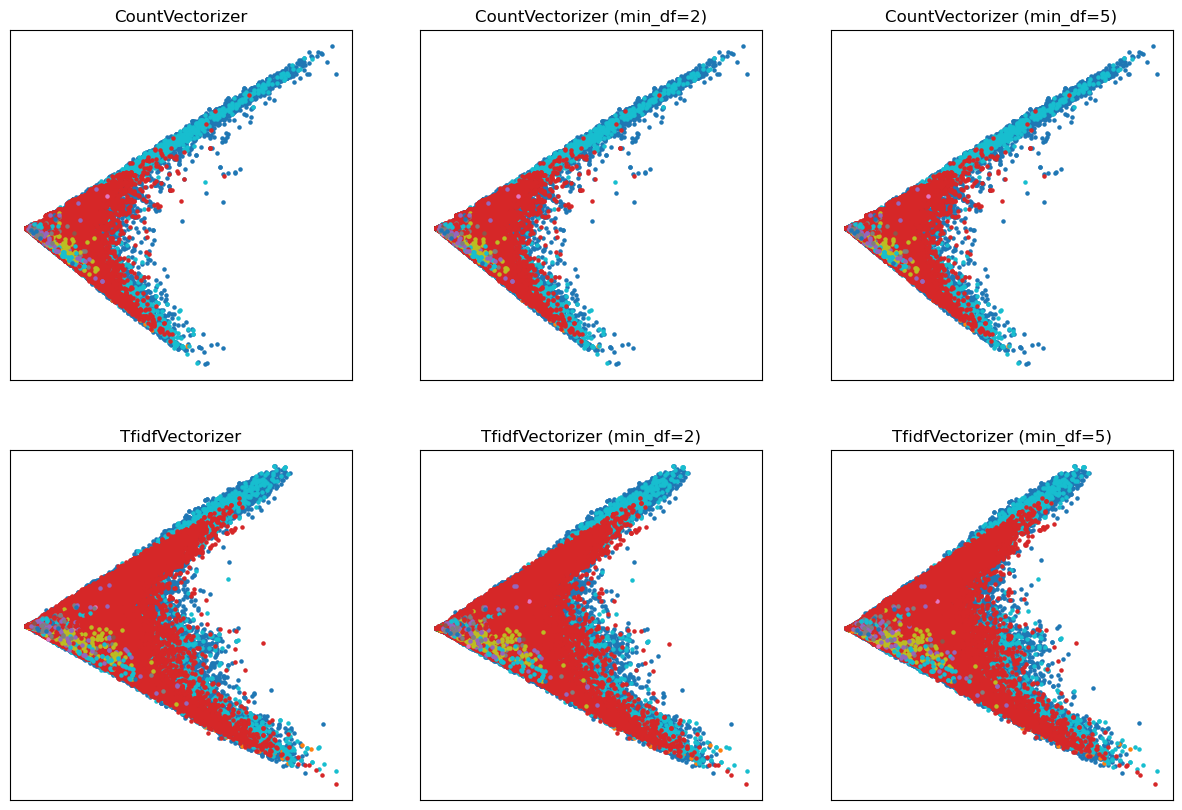

In [8]:
plot_doc_vectors(nome, target)

### Nome+Descrição 1-gram

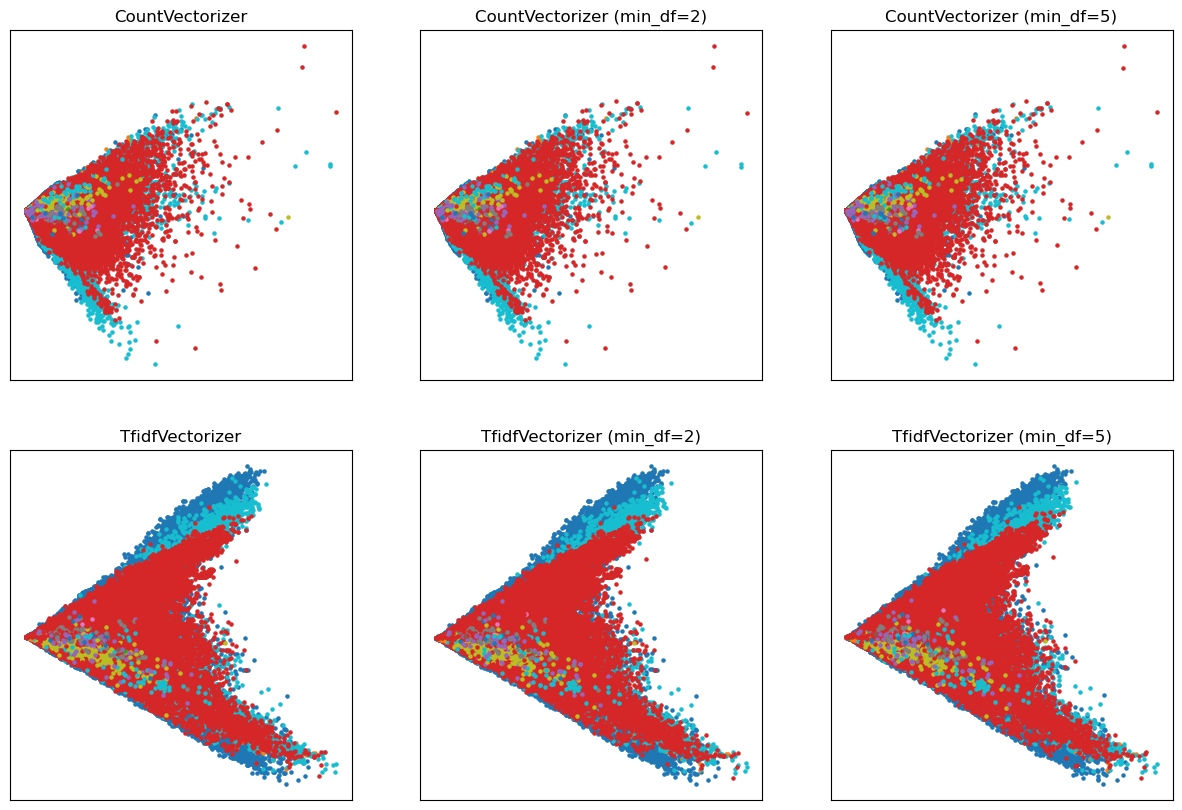

In [9]:
plot_doc_vectors(descricao,target)

### Nome 2-gram

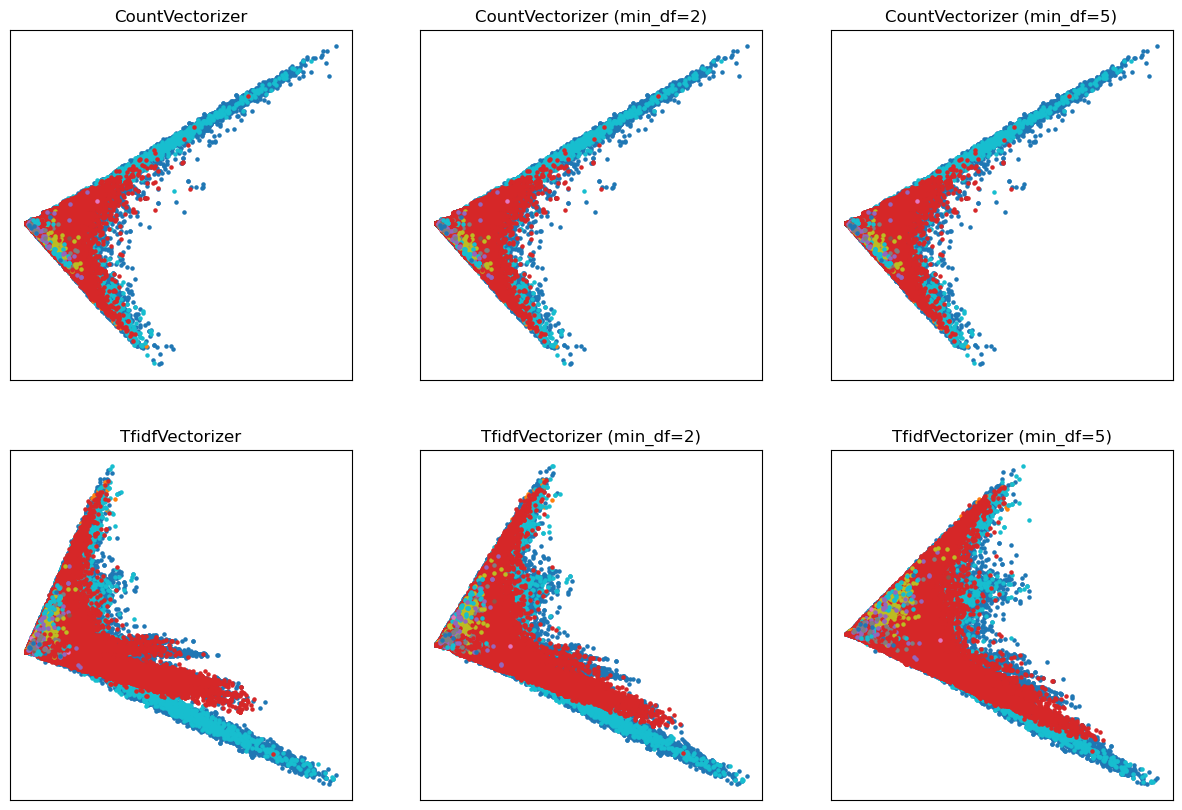

In [10]:
plot_doc_vectors(nome,target,ngram_range=(1,2))

### Nome+Descrição 2-gram

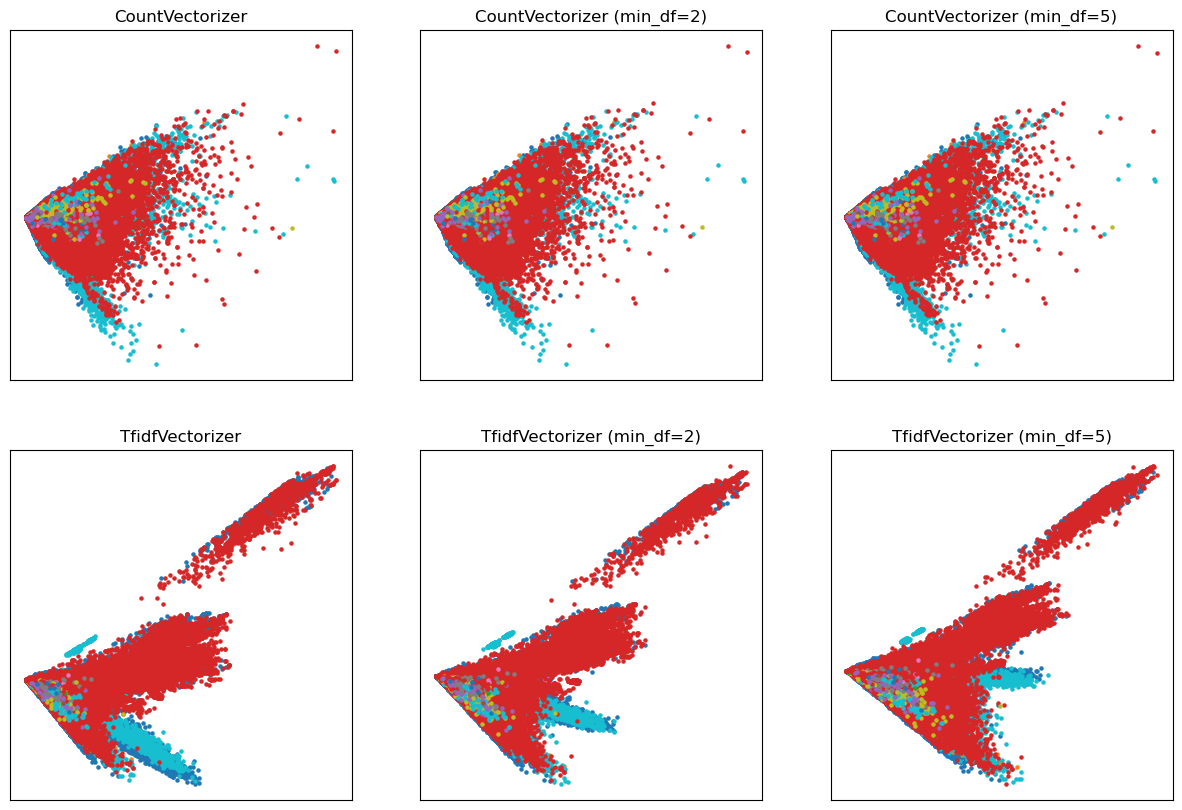

In [11]:
plot_doc_vectors(descricao,target,ngram_range=(1,2))

### Nome 3-gram

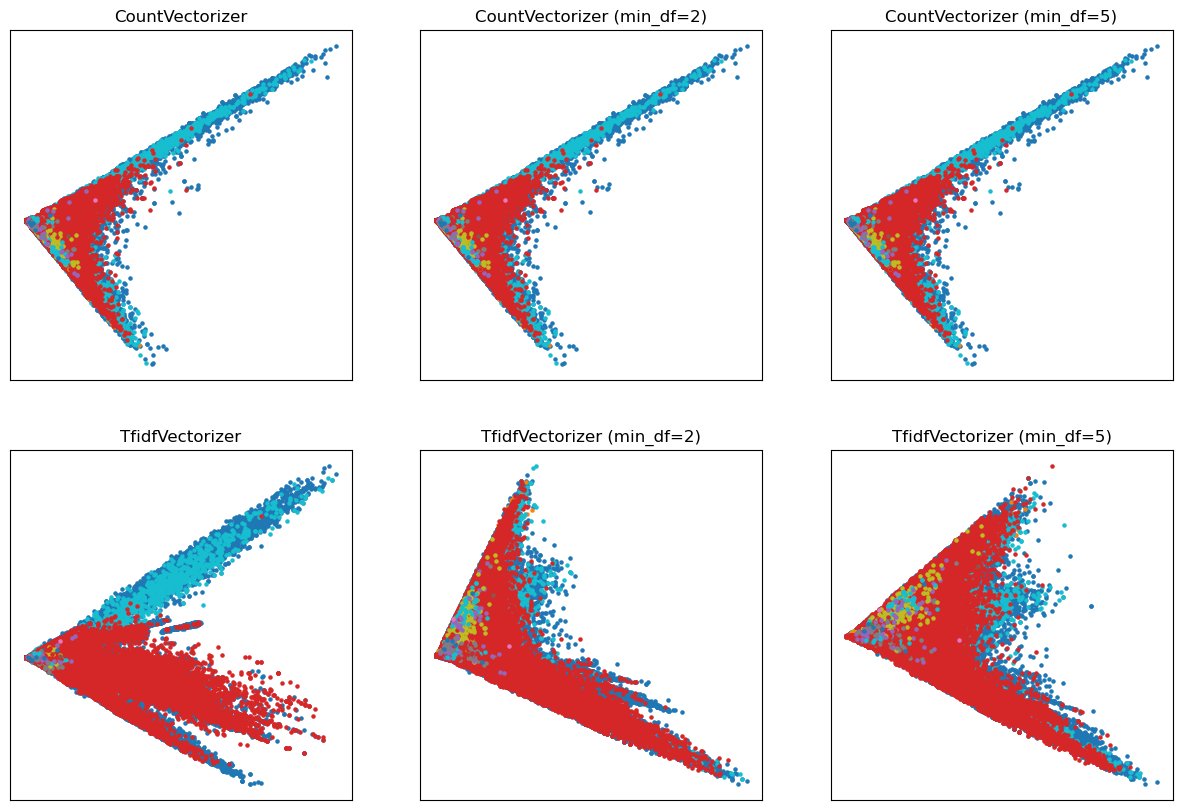

In [12]:
plot_doc_vectors(nome,target,ngram_range=(1,3))

### Nome+Descrição 3-gram

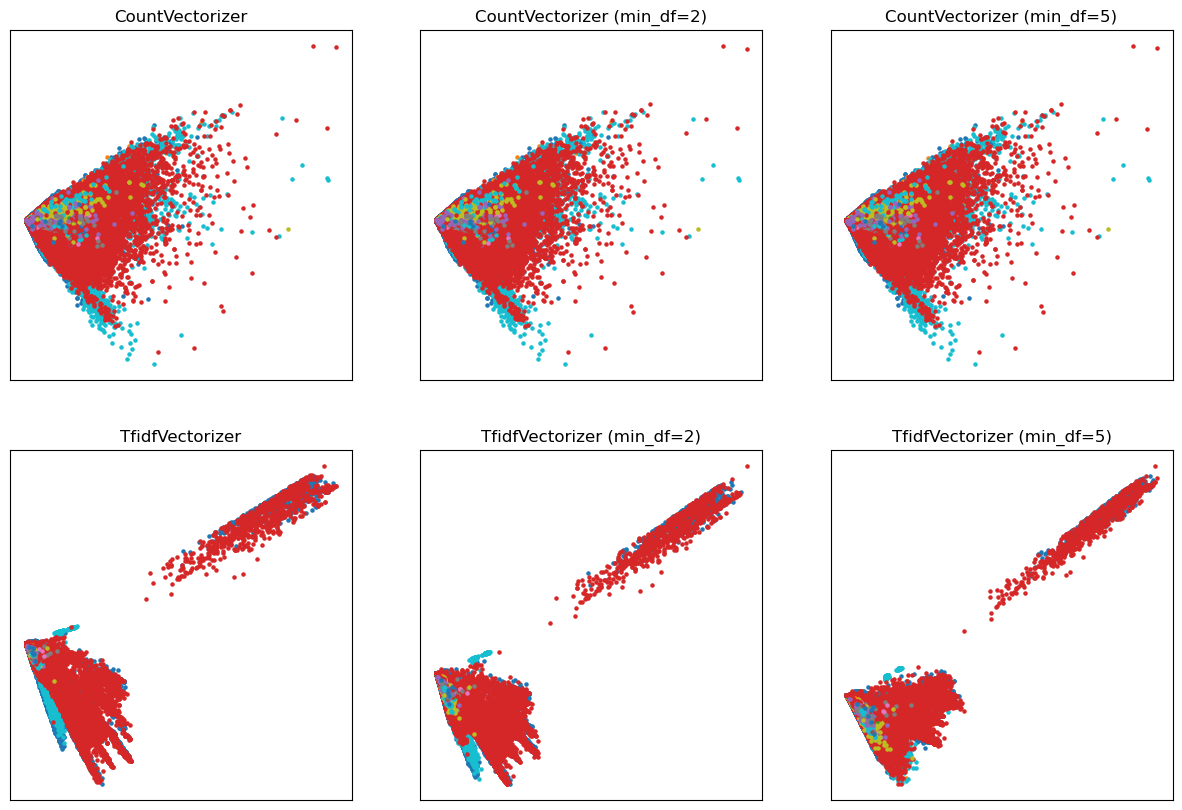

In [13]:
plot_doc_vectors(descricao,target,ngram_range=(1,3))